Here is a guide to inputting values:
The particle shape values are:
Rod = 1

Spherical = 2

Spindle = 3

Cubic = 4

Flower = 5

Flake = 6

Wrinkle = 7

Needle = 8

Ribbons = 9

Square = 10

Leaf = 11

Sheet = 12

Sheaf = 13

Plate = 14

Polyhedron = 15

Tetrapod = 16

Rectangular = 17

Bundle = 18

Strip = 19

Dendrite = 20

Dandelion = 21

Duster = 22

Cloud = 23

Tube = 24

Whisker = 25

Cylindrical = 26

Stone = 27

Elliptical = 28

Pyramid = 29


The solvent values are:

Water = 1

Eg = 2

Oleic acid = 3

Ethanol = 4

Water ethanol = 5

Isopropyl = 6

Propanol = 7

Methanol = 8

EtOH/CH2CLE = 9

Water EG = 10


Precursors:

n: Copper nitrate

c: Copper chloride

s: Copper sulfate

a & o: Coppee acetate


Particle size's unit: nm

Temperature's unit: Centigrade

Time's unit: hours

surfactant values:

NaOH = 1

CTAB = 2

Ammoniac = 3

Oleic acid = 4

Sodium carbonate = 5

Potasium carbonate = 6

Citric acid = 7

Monoethanolamine = 8

TAA = 9

PEG = 10

Diamine = 11

HMTA = 12

Eg = 13

Dodecyl benzene = 14

PVP = 15

<ipython-input-4-fd6c2e960105>:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)  # Fill missing categorical values with mode
<ipython-input-4-fd6c2e960105>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

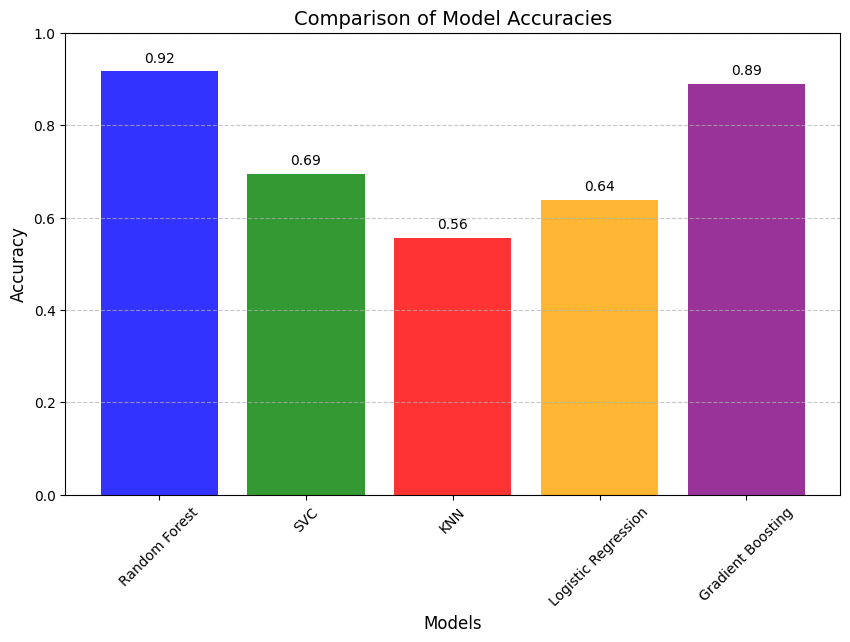

<ipython-input-4-fd6c2e960105>:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features, palette="viridis")


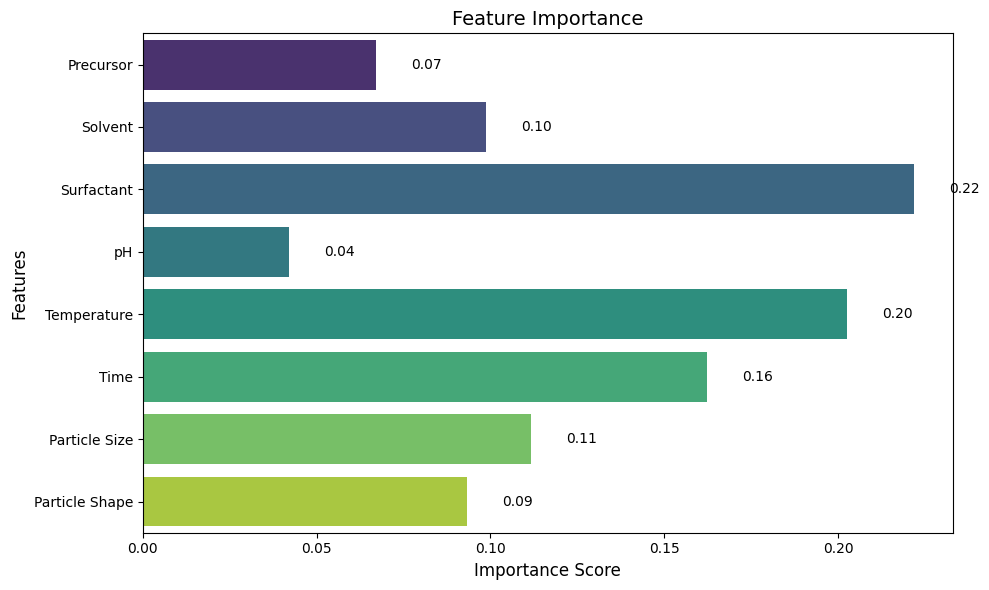

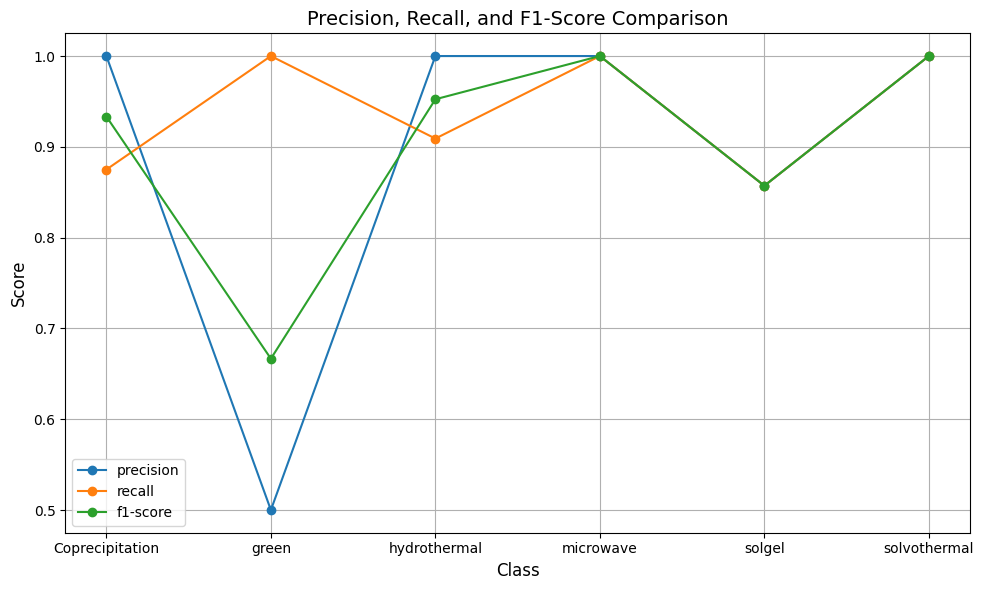

Enter values for the following parameters:
Precursor (e.g., n, c, s, a, o): c
Solvent (numeric value): 


ValueError: could not convert string to float: ''

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    precision_recall_curve
)

# Load the dataset
file_path = '/content/CuO.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Preprocess the data (including "surfuctant" and excluding unnecessary columns)
data_cleaned = data.drop(columns=["reducting agent", "easy"])

# Handle missing values
for column in data_cleaned.columns:
    if data_cleaned[column].dtype == 'object':
        data_cleaned[column].fillna(data_cleaned[column].mode()[0], inplace=True)  # Fill missing categorical values with mode
    else:
        data_cleaned[column].fillna(data_cleaned[column].mean(), inplace=True)  # Fill missing numeric values with mean

# Encode categorical columns
label_encoders = {}
for column in data_cleaned.select_dtypes(include='object').columns:
    label_encoders[column] = LabelEncoder()
    data_cleaned[column] = label_encoders[column].fit_transform(data_cleaned[column])

# Rename features to start with uppercase letters
data_cleaned.rename(columns={
    "solvent": "Solvent",
    "surfuctant": "Surfactant",
    "pH": "pH",
    "temperature": "Temperature",
    "timee": "Time",
    "particle size": "Particle Size",
    "particle shape": "Particle Shape",
    "Precursor": "Precursor"
}, inplace=True)

# Separate features and target variable
X = data_cleaned.drop(columns=["Method"])
y = data_cleaned["Method"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVC": SVC(kernel='linear', probability=True, random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[model_name] = accuracy_score(y_test, y_pred)

# Plot model accuracies
plt.figure(figsize=(10, 6))
colors = ['blue', 'green', 'red', 'orange', 'purple']
bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors, alpha=0.8)
plt.title('Comparison of Model Accuracies', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0, 1)
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.02, f"{height:.2f}", ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Feature importance plot (using Random Forest)
def plot_feature_importance():
    rf_model = models["Random Forest"]
    feature_importances = rf_model.feature_importances_
    features = X.columns
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances, y=features, palette="viridis")
    for index, value in enumerate(feature_importances):
        plt.text(value + 0.01, index, f"{value:.2f}", va="center")
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Feature Importance', fontsize=14)
    plt.tight_layout()
    plt.show()

plot_feature_importance()

# Precision, Recall, F1-Score
rf_model = models["Random Forest"]
def plot_precision_recall_f1_with_names():
    class_mapping = {i: label for i, label in enumerate(label_encoders["Method"].classes_)}
    report = classification_report(y_test, rf_model.predict(X_test), output_dict=True, zero_division=0)
    metrics = ["precision", "recall", "f1-score"]
    scores = {metric: [report[str(label)][metric] for label in np.unique(y_test)] for metric in metrics}
    class_names = [class_mapping[label] for label in np.unique(y_test)]

    plt.figure(figsize=(10, 6))
    for metric, values in scores.items():
        plt.plot(class_names, values, label=metric, marker='o')
    plt.title('Precision, Recall, and F1-Score Comparison', fontsize=14)
    plt.xlabel('Class', fontsize=12)
    plt.ylabel('Score', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_precision_recall_f1_with_names()

# Prediction function
def predict_synthesis_method():
    print("Enter values for the following parameters:")
    precursor = input("Precursor (e.g., n, c, s, a, o): ").strip().lower()
    if not precursor or precursor not in label_encoders["Precursor"].classes_:
        print("Error: Invalid Precursor value. Please enter one of the following:", label_encoders["Precursor"].classes_)
        return

    solvent = float(input("Solvent (numeric value): "))
    surfuctant = float(input("Surfactant (numeric value): "))
    pH = float(input("pH (numeric value): "))
    temperature = float(input("Temperature (numeric value): "))
    time = float(input("Time (numeric value): "))
    particle_size = float(input("Particle Size (numeric value): "))
    particle_shape = float(input("Particle Shape (numeric value): "))

    precursor_encoded = label_encoders["Precursor"].transform([precursor])[0]
    new_data = pd.DataFrame({
        "Precursor": [precursor_encoded],
        "Solvent": [solvent],
        "Surfactant": [surfuctant],
        "pH": [pH],
        "Temperature": [temperature],
        "Time": [time],
        "Particle Size": [particle_size],
        "Particle Shape": [particle_shape]
    })

    predicted_method = rf_model.predict(new_data)
    predicted_probability = rf_model.predict_proba(new_data).max()

    predicted_method_name = label_encoders["Method"].inverse_transform(predicted_method)
    print("\nPredicted Synthesis Method:", predicted_method_name[0])
    print(f"Confidence in Prediction: {predicted_probability:.2%}")

predict_synthesis_method()
